In [1]:
##importing required libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##loading the data.
df = pd.read_csv(r"C:\Users\kandu\Downloads\creditcard.csv\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
##seaparating features.
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, non_fraud_df])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Original dataset shape: {df.shape}")
print(f"Balanced subsample shape: {balanced_df.shape}\n")

Original dataset shape: (284807, 31)
Balanced subsample shape: (984, 31)



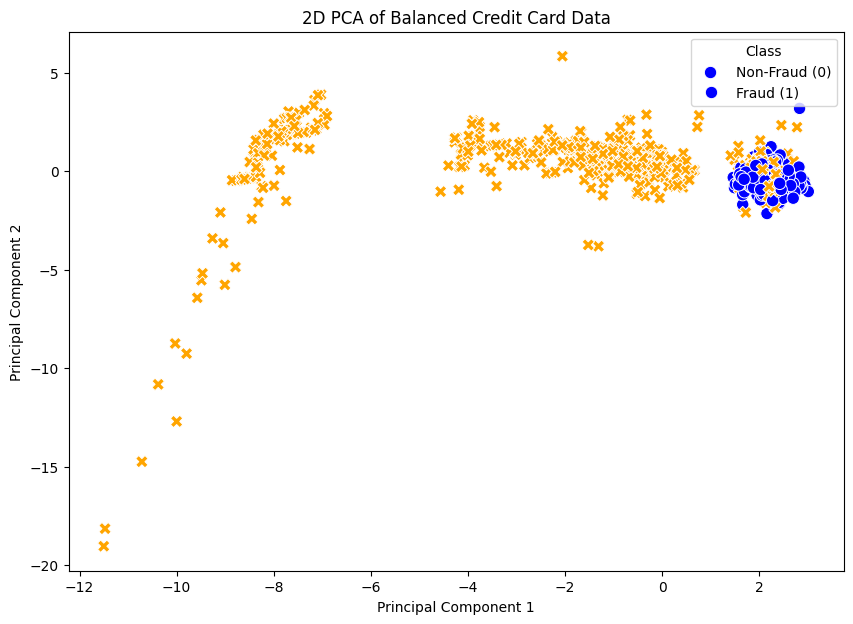

In [6]:
##PCA 2D visuvalization.
X_viz = balanced_df.drop('Class', axis=1)
y_viz = balanced_df['Class']
scaler_viz = StandardScaler()
X_scaled_viz = scaler_viz.fit_transform(X_viz)
pca = PCA(n_components=2)##reducing to 2dimension.
X_pca = pca.fit_transform(X_scaled_viz)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_viz, palette=['blue', 'orange'], style=y_viz, s=80)
plt.title('2D PCA of Balanced Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [9]:
##training SVM models
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']
scaler_model = StandardScaler()
X_scaled = scaler_model.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
models = {
    "Linear Kernel": svm_linear,
    "RBF Kernel": svm_rbf,
    "Polynomial Kernel": svm_poly
}

results = {}
for name, model in models.items():
    print(f"Training SVM with {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")

print(f"Accuracy with Linear Kernel:     {results.get('Linear Kernel', 0):.4f}")
print(f"Accuracy with RBF Kernel:        {results.get('RBF Kernel', 0):.4f}")
print(f"Accuracy with Polynomial Kernel: {results.get('Polynomial Kernel', 0):.4f}")

Training SVM with Linear Kernel
Accuracy: 0.9289
Training SVM with RBF Kernel
Accuracy: 0.9239
Training SVM with Polynomial Kernel
Accuracy: 0.8579
Accuracy with Linear Kernel:     0.9289
Accuracy with RBF Kernel:        0.9239
Accuracy with Polynomial Kernel: 0.8579
